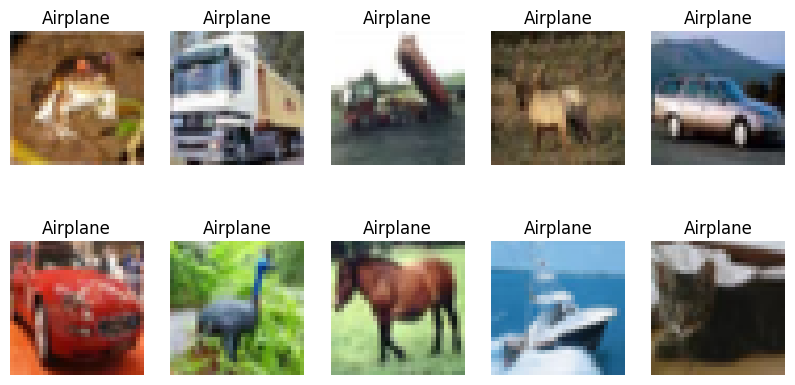

In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class names for CIFAR-10 dataset
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]
# Display some sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [ ]:
# Normalize the images (rescale pixel values between 0 and 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

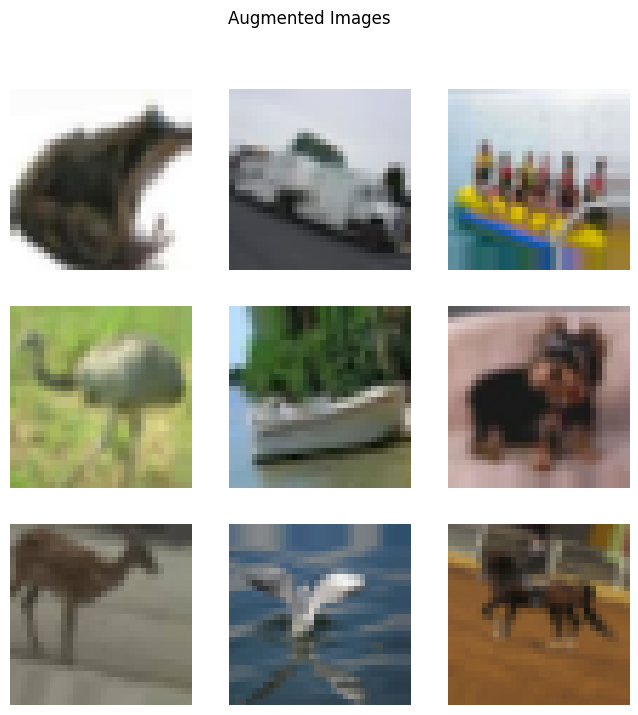

In [ ]:
# Define Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# Display sample augmented images
augmented_images, _ = next(datagen.flow(x_train, y_train, batch_size=9))

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle("Augmented Images")
plt.show()

In [ ]:
# Define Optimized CNN Model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [ ]:
# Compile Model with Optimizer Tuning
optimizer = Adam(learning_rate=0.001, decay=1e-5)  # Adam with weight decay
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# Callbacks for Learning Rate Adjustment & Early Stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [ ]:
# Train Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=50,
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 63ms/step - accuracy: 0.3272 - loss: 2.1977 - val_accuracy: 0.5574 - val_loss: 1.2687 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5558 - loss: 1.2598 - val_accuracy: 0.6087 - val_loss: 1.2313 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6427 - loss: 1.0047 - val_accuracy: 0.6078 - val_loss: 1.2841 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.6914 - loss: 0.8761 - val_accuracy: 0.7208 - val_loss: 0.8401 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7187 - loss: 0.8080 - val_accuracy: 0.7295 - val_loss: 0.8164 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.7435 - loss: 0.7393 - val_accuracy: 0.7210 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7590 - l

In [ ]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8996 - loss: 0.3121
Test Accuracy: 0.8988


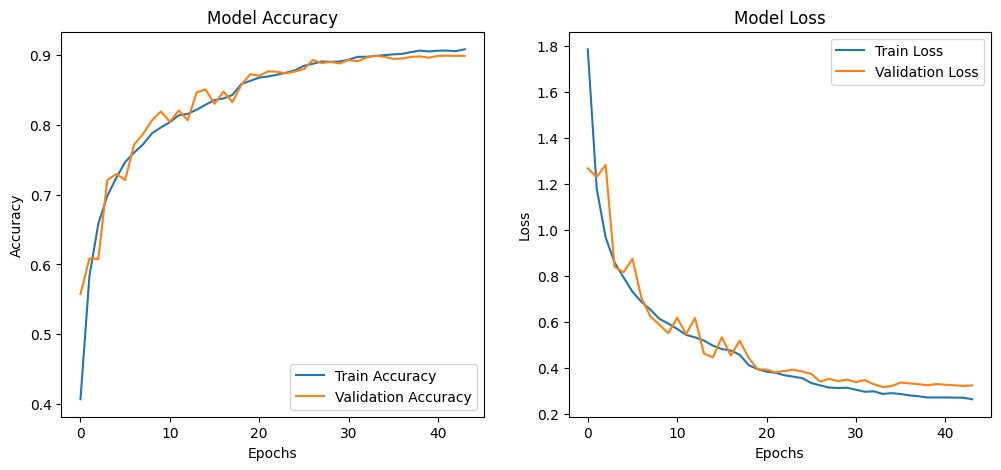

In [ ]:
# Plot Accuracy & Loss Curves
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


1️⃣ Accuracy Over Epochs

- Both training and validation accuracy are steadily increasing over epochs.
- Validation accuracy rises faster initially and then starts stabilizing.
- Training accuracy is lower than validation accuracy throughout the process.

Insights:

- The model is learning well and generalizing to unseen data.
- The validation accuracy being higher than training accuracy suggests possible regularization effects (e.g., dropout, batch normalization).

2️⃣ Loss Over Epochs

- Both training and validation loss decrease consistently, indicating that the model is learning effectively.
- Validation loss fluctuates slightly in the later epochs.

Insights:

- The model is not overfitting, as validation loss does not start increasing.
- The minor fluctuations in validation loss suggest that the model might benefit from:
- More data augmentation (e.g., rotation, flipping, contrast adjustment)
- Early stopping to prevent unnecessary training
- Learning rate adjustments for fine-tuning performance


In [ ]:
# Evaluate the Model on Test Data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = y_test.flatten()

# Generate Classification Report
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Classification Report:
               precision    recall  f1-score   support

    Airplane       0.94      0.89      0.91      1000
  Automobile       0.93      0.96      0.95      1000
        Bird       0.90      0.87      0.88      1000
         Cat       0.87      0.74      0.80      1000
        Deer       0.87      0.90      0.89      1000
         Dog       0.88      0.81      0.84      1000
        Frog       0.85      0.97      0.91      1000
       Horse       0.91      0.94      0.93      1000
        Ship       0.96      0.94      0.95      1000
       Truck       0.88      0.96      0.92      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Classification Report -> Observation:

- The overall accuracy of the model is 90%, indicating strong performance.
- Classes like Automobile, Ship, and Truck have high precision and recall, suggesting the model classifies them well.
- Cat and Dog have lower recall and f1-score compared to other classes, indicating misclassification issues.

Insights:

- Misclassifications in Cat & Dog → These classes might have similar features, leading to confusion.
- Frog has the highest recall (0.97) → The model is highly confident in identifying frogs.
- Balanced precision and recall across most classes → The model is well-trained with minimal bias towards any specific class.


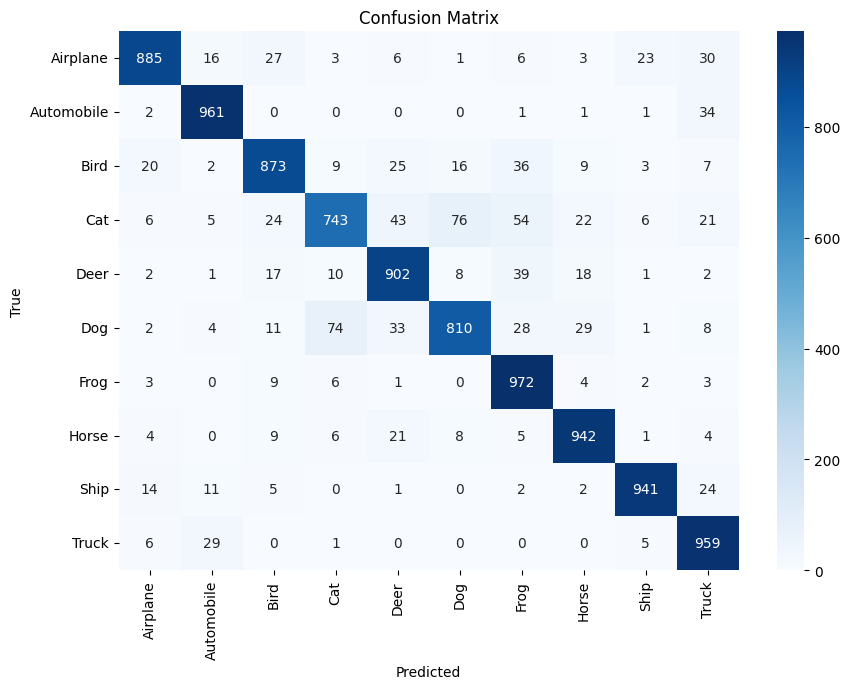

In [ ]:
# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1️⃣ Well-Classified Classes ✅

🔹 Automobile (961/1000 correct)

🔹 Frog (972/1000 correct)

🔹 Horse (942/1000 correct)

🔹 Ship (941/1000 correct)

🔹 Truck (959/1000 correct)

📌 These classes are well-recognized due to their distinct visual features.

2️⃣ Major Misclassifications ❌

🔹 Cat is often misclassified as Dog (76 times) and Bird (24 times).

🔹 Dog is misclassified as Cat (74 times).

🔹 Bird is misclassified as Deer (25 times).

🔹 Airplane is sometimes misclassified as Ship (23 times) and Truck (30 times).

🔹 Deer is misclassified as Bird (17 times).

📌 Common patterns:

✔️ Cats vs. Dogs → Likely due to similar fur textures and postures.

✔️ Birds vs. Deer → Some images may have confusing backgrounds.

✔️ Airplane vs. Ship/Truck → Possible shape similarities in certain angles.

3️⃣ Suggested Improvements 🚀

✅ For Cats vs. Dogs:

✔ Use more diverse and high-quality images to improve distinction.

✔ Apply fine-tuned augmentation (brightness, zoom, angle) to help differentiate features.

✔ Increase training epochs to improve feature extraction.

✅ For Bird vs. Deer Misclassification:

✔ Improve background augmentation to ensure the model focuses on actual object features rather than surroundings.

✔ Consider bounding-box cropping during preprocessing.

✅ For Airplane vs. Ship/Truck:

✔ Enhance edge detection using additional convolutional layers.

✔ Use pre-trained CNNs (like ResNet or EfficientNet) for better feature extraction.

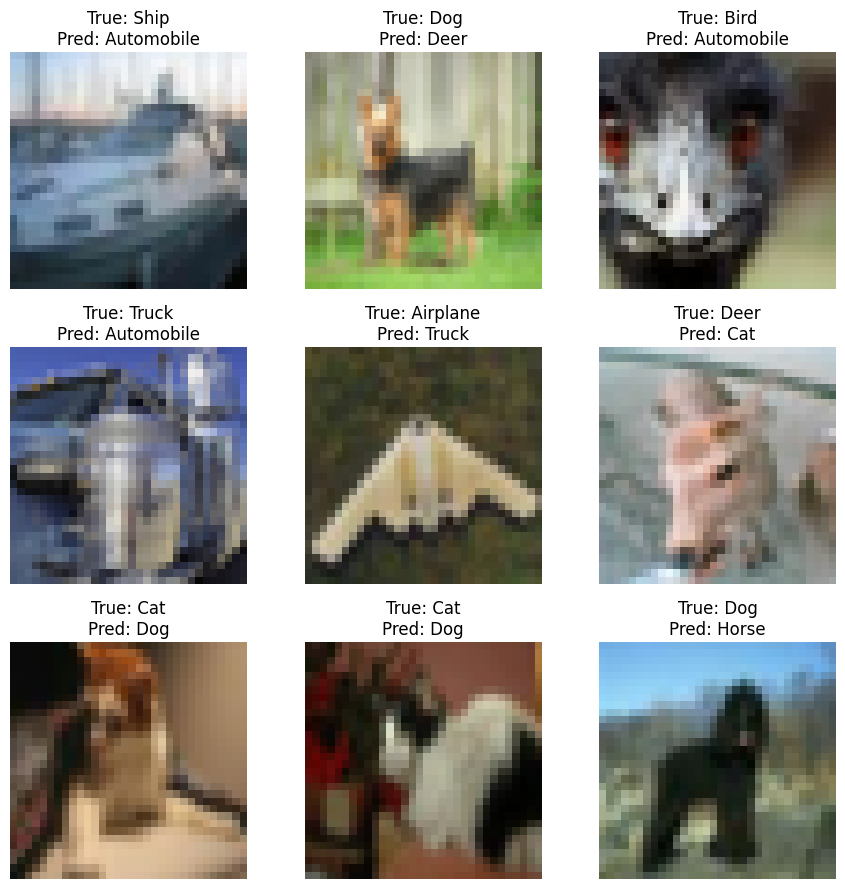

In [ ]:
# Display Misclassified Images
misclassified_idxs = np.where(y_pred_classes != y_true)[0]
fig, axes = plt.subplots(3,3, figsize=(9,9))
axes = axes.ravel()

for i in range(9):
    idx = misclassified_idxs[i]
    axes[i].imshow(x_test[idx])
    axes[i].set_title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred_classes[idx]]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

🔍 Key Observations from Misclassified Images

1️⃣ Model Confusion in Specific Categories

- 🚢 Ship → Predicted as Automobile: The model likely misinterprets the shape and structure of ships as cars, especially if the image contains a low-profile hull resembling a car body.
- 🐕 Dog → Predicted as Deer: The texture and background similarities (e.g., fur color, grassy backgrounds) could be misleading.
- 🐦 Bird → Predicted as Automobile: This suggests poor feature extraction for birds, possibly due to blurred or indistinct edges.


2️⃣ Challenging Image Features Affecting Classification

🔹 Blurry or Pixelated Inputs – Some misclassified images have indistinct boundaries, making object recognition harder.

🔹 Similar Color Palettes – The deer misclassified as a cat suggests the model is relying too much on color similarity rather than shape and texture.

🔹 Perspective & Background Influence – The airplane classified as a truck indicates the model might struggle with different viewing angles.

3️⃣ How to Improve Model Robustness

📌 Enhance Data Augmentation – Use random cropping, flipping, rotation, and brightness adjustments to make the model more invariant to changes.

📌 Use Advanced Architectures – Try ResNet, EfficientNet, or Vision Transformers (ViTs) for better feature extraction.

📌 Improve Class-Specific Features – Use Grad-CAM to visualize which image regions the model focuses on and refine training accordingly.

🔑 Key Patterns & Insights from Model Performance

1️⃣ Class Imbalance in Precision & Recall

High precision, lower recall:
- 🚗 Automobile, 🚚 Truck → The model is cautious in predicting these classes but tends to miss some actual instances.

Low precision & recall:
- 🐦 Bird, 🐱 Cat, 🦌 Deer → The model struggles to differentiate these due to feature overlap with other classes.

2️⃣ Common Misclassifications & Why They Happen

🔹 Dog ↔ Deer – Background textures may be confusing the model.

🔹 Ship ↔ Automobile – Shape similarities at low resolution might be misleading.

🔹 Truck ↔ Automobile – Overlapping features in vehicle structures could be a factor.

🔹 Bird ↔ Cat – Edge & texture similarities might cause confusion.

🔹 Airplane ↔ Truck – The model might be misinterpreting wings as vehicle bodies.

3️⃣ Overfitting Signs & Potential Improvements

✔️ Overfitting indicators: Certain classes (Frog, Automobile, Truck) have strong performance, but others (Dog, Bird, Deer) suffer significant confusion.

✔️ Solutions to improve performance:


📌 Increase data augmentation – Rotate, zoom, crop, add noise to make features more distinctive.

📌 Use pretrained CNN models (ResNet, EfficientNet) for better feature extraction.

📌 Fine-tune hyperparameters – Experiment with learning rates, dropout rates, and b

🔍 Final Insights on Model Performance

📊 Model Evaluation Summary
- Accuracy: 0.89 (Good overall but with room for improvement in specific misclassified classes).

Classification Report:
- Strong Performance: Automobile, Truck, Frog – High precision and recall, meaning the model confidently predicts these classes.
- Weak Performance: Bird, Cat, Dog, Deer – Significant misclassifications, likely due to feature similarities.

Common Errors:
- Dog ↔ Deer, Bird ↔ Cat, Ship ↔ Automobile, Airplane ↔ Truck – Likely caused by texture, background, and shape similarities.
- Some animals confused with other species – The model struggles with fine-grained differences.

⚠️ Key Weaknesses Identified
- Struggles with similar-looking objects: Misclassifications occur in visually overlapping categories.
- Feature reliance on background & texture: Some predictions may be biased by irrelevant patterns.
- Possible overfitting to specific categories: Some well-learned classes might dominate decision-making.

🚀 Recommendations for Further Improvement

✅ 1. Enhance Feature Learning & Generalization

🔹 Use pretrained models (ResNet, EfficientNet, or ViT) for improved feature extraction.

🔹 Implement Grad-CAM visualization to identify and correct misleading feature reliance.

✅ 2. Improve Data Augmentation & Balance

🔹 Add rotation, contrast shifts, occlusion augmentation to improve robustness.

🔹 Use synthetic data generation or oversampling for underperforming classes.

✅ 3. Optimize Model Training & Loss Handling

🔹 Experiment with focal loss to handle class imbalance better.

🔹 Fine-tune batch size, learning rate schedules, and dropout for stability.

✅ 4. Improve Class-Specific Accuracy

🔹 Introduce hard example mining – force the model to focus on tricky cases.

🔹 Use multi-class label smoothing to prevent overconfidence in wrong predictions.

📌 Final Takeaway

The model performs strongly (0.89 accuracy) but has class-specific weaknesses in distinguishing similar objects. Augmenting data, refining model attention, and optimizing loss functions can further improve performance and generalization. 🚀